<a href="https://colab.research.google.com/github/pawntoqueen/NLP-examples/blob/main/Stanford_NLP_Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **datasete erişim izni**
ilk üç hücre, verisetlerinin ve kodların kayıt olduğu drive'a erişim için gereklidir.

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# Insert the directory
import sys
sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
import numpy as np

# Get the interactive Tools for Matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
INPUT_FOLDER = '/content/drive/My Drive/Colab Notebooks/Glove_datasets/glove.6B.300d.txt'
word2vec_glove_file = get_tmpfile("glove.6B.300d.word2vec.txt")
glove2word2vec(INPUT_FOLDER, word2vec_glove_file)

(400000, 300)

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
model.most_similar('computer')

[('computers', 0.8248153924942017),
 ('software', 0.733441948890686),
 ('pc', 0.6240140199661255),
 ('technology', 0.6198545694351196),
 ('computing', 0.6178765296936035),
 ('laptop', 0.5955508947372437),
 ('internet', 0.5857782363891602),
 ('ibm', 0.5825320482254028),
 ('systems', 0.574499249458313),
 ('hardware', 0.5728795528411865)]

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.6713


In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('japan', 'japanese', 'turkey')

'turkish'

In [ ]:
analogy("")

In [ ]:
analogy('australia', 'beer', 'us')

'drink'

In [ ]:
analogy('obama', 'clinton', 'trump')

In [ ]:
analogy('good', 'fantastic', 'bad')

In [ ]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='r', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x, y, word)

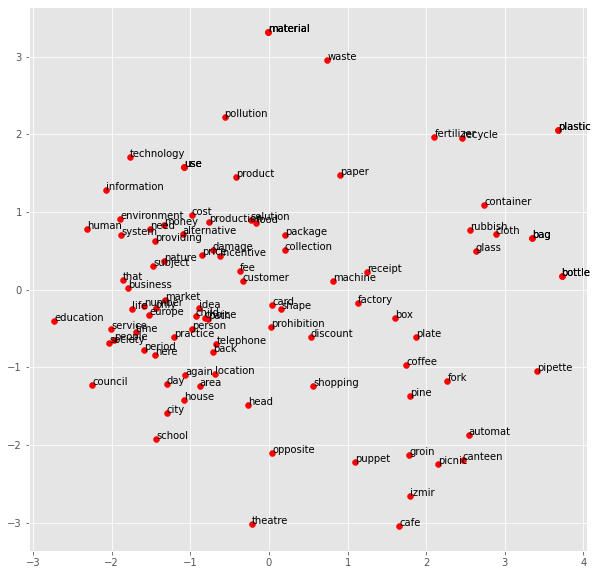

In [ ]:
display_pca_scatterplot(model, 
["plastic","use","product","waste","nature","only","human","that","bag","market","bag","glass","rubbish","cloth","alternative","shopping","discount","automat","izmir","use","location","back","coffee","pipette","shape","council","environment","recycle","system","card","canteen","school","groin","child","subject","opposite","material","business","solution","number","again","area","customer","bottle","package","use","puppet","machine","cost","pine","collection","price","fee","cafe","box","bottle","city","fork","material","production","factory","plastic", "material","food","paper","technology","time","incentive","society","money","people","providing","person","education","here","plate","theatre","life","idea","day","damage","picnic","head","information","service","need","receipt","telephone","pollution","container","house","prohibition","path","period","choice","practice","fertilizer","europe"])

In [ ]:
display_pca_scatterplot(model, sample=300)

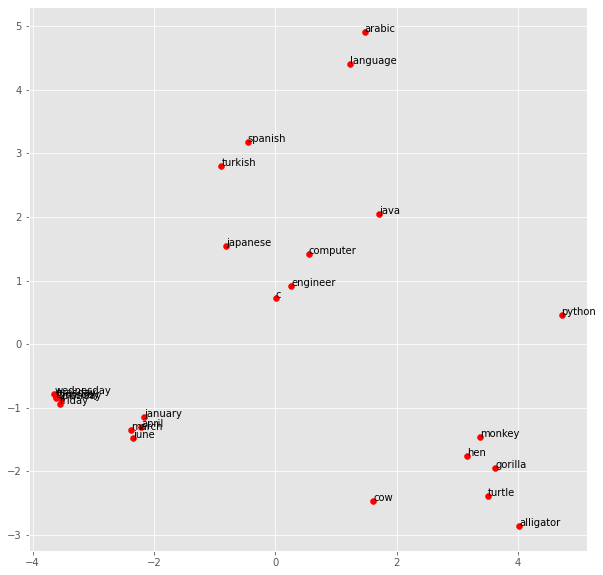

In [ ]:
display_pca_scatterplot(model, ["monday","tuesday" , "wednesday","thursday", "friday", "language", "python", "java", "c", "engineer", "computer", "january", "april","june","march","spanish","arabic","turkish","japanese","gorilla","alligator", "monkey","cow","hen","turtle"])
